## Lesson Summary (Data Wrangling):
Following the course of Data Wrangling at Udacity, there are two ways of data assessing: Quality and Tidiness.
1. **Quality** assessment: 
   
   (1) **Completeness**: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
   
   (2) **Validity**: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
   
   (3) **Accuracy**:inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
   
   (4) **Consistency**: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.


2. **Tidiness**:

    (1) Each variable forms a column.
    
    (2) Each observation forms a row.
    
    (3) Each type of observational unit forms a table.
   

## Data Wrangling (project WeRateDogs)

In [1]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
import tweepy

In [2]:
tweet_masterdata = pd.read_csv('https://www.dropbox.com/s/adt3ukrtykvi0z3/twitter-archive-enhanced.csv?dl=1')
image_prediction = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', delimiter='\t')

In [3]:
tweet_masterdata.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
724,782747134529531904,NaN,NaN,2016-10-03 01:00:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Deacon. He's the happiest almost dry d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782747134...,11,10,Deacon,doggo,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
773,776249906839351296,NaN,NaN,2016-09-15 02:42:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Pls stop sen...,7.007478e+17,4.196984e+09,2016-02-19 18:24:26 +0000,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None
426,821407182352777218,NaN,NaN,2017-01-17 17:21:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sundance. He's a doggo drummer. Even s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821407182...,14,10,Sundance,doggo,None,None,None
245,845812042753855489,NaN,NaN,2017-03-26 01:38:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate polar bears but this one...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845812042...,13,10,None,None,None,None,None


In [4]:
tweet_masterdata.info()
# Erroneous datatypes: timestamp, retweeted_status_timestamp are "object", but should be'datetime64'. 
# Erroneous datatypes: tweet_id is int64, but should be str.
# Tidiness issues noted: Retweet related columns are probably unnecessary as we only want original ratings with images.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
tweet_masterdata.describe()
# It's interesting to see rating_numerator is higher than ratinng_denominator.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [6]:
tweet_masterdata.name.value_counts()
# The names of dogs are not always available, None, a, also consistency of names should be either upper  case or lower case.

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
Sadie         8
the           8
Daisy         7
Buddy         7
Bailey        7
an            7
Toby          7
Koda          6
Stanley       6
Bella         6
Scout         6
Milo          6
Jax           6
Leo           6
Oscar         6
Jack          6
Dave          6
Rusty         6
Phil          5
           ... 
Poppy         1
Ralphy        1
Emanuel       1
this          1
Pepper        1
Monkey        1
Linus         1
Jo            1
Mya           1
Brady         1
Livvie        1
all           1
Mitch         1
Apollo        1
Nico          1
Timofy        1
Hamrick       1
Siba          1
Raphael       1
Strudel       1
Tito          1
Finnegus      1
Ralphus       1
Jessifer      1
Corey         1
Duddles       1
Chef          1
Mosby         1
Clarkus       1
Bones         1
Name: name, Length: 957,

In [7]:
def data_none(column_name):
    return tweet_masterdata[tweet_masterdata[column_name] == "None"].tweet_id.count()

doggo = print('doggo with None =', data_none('doggo'))   
floofer = print('floofer with None =', data_none('floofer'))
pupper = print('pupper with None =', data_none('pupper'))
puppo = print('puppo with None =', data_none('puppo'))
# Tidiness issue noted: For the type of dogs should be melted into 1 columns, instead of 4 columns (doggo, floofer, pupper and puppo)

doggo with None = 2259
floofer with None = 2346
pupper with None = 2099
puppo with None = 2326


In [8]:
tweet_masterdata[(tweet_masterdata[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]
tweet_masterdata['stage'] = tweet_masterdata.doggo + tweet_masterdata.floofer + tweet_masterdata.pupper + tweet_masterdata.puppo
tweet_masterdata.loc[tweet_masterdata.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
tweet_masterdata.loc[tweet_masterdata.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
tweet_masterdata.loc[tweet_masterdata.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [9]:
tweet_masterdata.groupby('stage').stage.count()
# 14 out of 2356 cases with more than one dog stages.

stage
NoneNoneNoneNone        1976
NoneNoneNonepuppo         29
NoneNonepupperNone       245
NoneflooferNoneNone        9
doggoNoneNoneNone         83
doggoNoneNonepuppo         1
doggoNonepupperNone       12
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [10]:
tweet_masterdata[tweet_masterdata['rating_numerator'] > tweet_masterdata['rating_denominator']].tweet_id.count()
# It's strange that rating numerator is higher than rating_denominator (1451 rows out of 2356 are noted). But it seems it's humor of this twitter account (We Rate Dogs).

1451

In [11]:
tweet_masterdata[tweet_masterdata['rating_numerator'] > 10].sort_values(by = 'rating_numerator', ascending=False)
# Erroneous rating_nominator, although it’s probably twitter humor, but there are extreme rating, e.g., 1776, 960, 666, 420.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None,NoneNoneNoneNone
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,NoneNoneNoneNone
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None,NoneNoneNoneNone
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None,NoneNoneNoneNone
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None,NoneNoneNoneNone
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None,NoneNoneNoneNone
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None,NoneNoneNoneNone
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None,NoneNoneNoneNone
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None,NoneNoneNoneNone
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None,NoneNoneNoneNone


In [12]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
823,693155686491000832,https://pbs.twimg.com/media/CZ6VatdWwAAwHly.jpg,3,Shih-Tzu,0.697480,True,Lhasa,0.200151,True,Tibetan_terrier,0.090970,True
104,667832474953625600,https://pbs.twimg.com/media/CUSeGFNW4AAyyHC.jpg,1,miniature_pinscher,0.214200,True,bath_towel,0.146789,False,Chihuahua,0.104152,True
1158,733822306246479872,https://pbs.twimg.com/media/Ci8Pfg_UUAA2m9i.jpg,1,Lhasa,0.457356,True,Shih-Tzu,0.371282,True,Tibetan_terrier,0.048359,True
912,700847567345688576,https://pbs.twimg.com/media/CbnpI_1XIAAiRAz.jpg,1,Rhodesian_ridgeback,0.252514,True,redbone,0.153005,True,whippet,0.135199,True
183,669353438988365824,https://pbs.twimg.com/media/CUoFZTyW4AE70iD.jpg,1,teddy,0.379656,False,Pembroke,0.212343,True,chow,0.096995,True


In [13]:
image_prediction.info()
# data type for tweet_id is int64, but should be str.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
sum(image_prediction.jpg_url.duplicated())
# 66 duplicated image urls are noted. Try to understand the reason of duplication.

66

In [15]:
image_prediction[image_prediction['jpg_url'].duplicated()].sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1727,820446719150292993,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True
1804,832215726631055365,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1,Afghan_hound,0.274637,True,borzoi,0.142204,True,doormat,0.109677,False
1803,832040443403784192,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
1594,798697898615730177,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True


In [16]:
(image_prediction[image_prediction['p1_dog'] == True].count()[0] / image_prediction.tweet_id.nunique(),
 image_prediction[image_prediction['p2_dog'] == True].count()[0] / image_prediction.tweet_id.nunique(),
 image_prediction[image_prediction['p3_dog'] == True].count()[0] / image_prediction.tweet_id.nunique())

(0.7383132530120482, 0.74843373493975907, 0.72240963855421692)

In [17]:
(image_prediction.p1_conf.mean(), image_prediction.p2_conf.mean(), image_prediction.p3_conf.mean())
# we can only probably use columns of p1 and p1_dog, as p2 and p3 don't have high confidence level.

(0.59454826361445778, 0.13458860950039181, 0.060324168618106515)

In [18]:
image_prediction[image_prediction['jpg_url'] == 'https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg']
# Selected 1 duplicated url as sample to understand the reason. For example, when visiting 782021823840026624, twitter directs back to 707610948723478529.
# The reason is possibly "retweets". Thus the duplication should be excluded from the analysis.

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
985,707610948723478529,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,1,golden_retriever,0.383223,True,cocker_spaniel,0.16593,True,Chesapeake_Bay_retriever,0.118199,True
1487,782021823840026624,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,1,golden_retriever,0.383223,True,cocker_spaniel,0.16593,True,Chesapeake_Bay_retriever,0.118199,True


In [19]:
image_prediction.p1.value_counts()
# The dog types at p1, p2, and p3 are not very consistent in terms of lower case or capital letter.

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
Maltese_dog                   18
beagle                        18
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [20]:
image_prediction.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
miniature_pinscher                 20
chow                               20
Samoyed                            20
toy_terrier                        20
malinois                           20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [21]:
r = requests.get('https://www.dropbox.com/s/0tgorsy7gjgo81n/tweet_json.txt?dl=1')
tweet_overview = pd.read_json(r.text, lines=True)

In [22]:
pd.set_option('display.max_columns', 500)
tweet_overview.sample(5)
# Data tidiness issue noted: several columns should be deleted or extracted to make this table more clear with useful info. For example, geo, contributors, coordinates, place has no or only 1 data on it and should be removed.
# Retweet related columns are probably unnecessary as we only want original ratings with images.

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1028,NaN,NaN,2016-06-22 01:50:58,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 745433859332898817, 'id_str'...",7824,False,This is Lenox. She's in a wheelbarrow. Silly d...,NaN,745433870967832576,745433870967832576,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,2894,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
804,NaN,NaN,2016-09-03 16:52:02,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 772114938034814977, 'id_str'...",3005,False,This is Finn. He's very nervous for the game. ...,NaN,772114945936949249,772114945936949248,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,546,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1912,NaN,NaN,2015-12-08 20:53:11,"[0, 11]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,602,False,13/10\n@ABC7,NaN,674330906434379776,674330906434379776,ABC7,6.658147e+17,6.658147e+17,16374678.0,16374678.0,False,und,None,NaN,NaN,NaN,NaN,NaN,83,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1385,NaN,NaN,2016-02-19 02:20:14,"[0, 86]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 700505126490886144, 'id_str'...",2487,False,This is Kaia. She's just cute as hell. 12/10 I...,NaN,700505138482569216,700505138482569216,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,646,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
316,NaN,NaN,2017-02-23 15:25:23,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 834786230550290432, 'id_str'...",22943,False,This is Tobi. She is properly fetching her sho...,NaN,834786237630337024,834786237630337024,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,6159,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [23]:
tweet_overview[tweet_overview['id'] != tweet_overview['id_str']].id.count()
# Quality issue: noted 836 id and id_str are not the same, for example: id (892420643555336193) is id_str (892420643555336192).
# So we should focus on variable id, and exclude id_str from analysis.

836

In [24]:
print('duplicate tweet_id at tweet_masterdata = '+ str(sum(tweet_masterdata.tweet_id.duplicated())))
print('duplicate tweet_id at image_prediction = '+ str(sum(image_prediction.tweet_id.duplicated())))
print('duplicate id at tweet_overview = ' + str(sum(tweet_overview.id.duplicated())))
# No duplicate tweet_id is noted.

duplicate tweet_id at tweet_masterdata = 0
duplicate tweet_id at image_prediction = 0
duplicate id at tweet_overview = 0




## Quality issues:
**1.	tweet_masterdata**:
-	Erroneous datatypes (timestamp, retweeted_status_timestamp).    
-	The names of dogs are not always available, None, a, also consistency of names should be either upper case or lower case.  
-	Data type for tweet_id is int64, but should be str.  
-	Unreasonable rating_ numerator is noted, although it’s probably twitter humor, but there are extreme rating, e.g., 1776, 960, 666, 420. Moreover, it’s noted that some ratings are not aligned with twitter texts.   
-	Several columns should be deleted, for example, retweet related columns are probably unnecessary as we only want original ratings with images.  


**2.	image_prediction**:
-	Names of columns (variables) are not very clear on the content. For example, it’s not clear what stands for p1, p2. So “rename” of these columns are needed.  
-	The data formats at p1, p2, and p3 are not very consistent in terms of lower case or capital letter. The consistency of format is needed to identify potential duplicates.  
-	66 duplicated image urls are identified and the reason is possibly due to retweet. Thus these duplication should be excluded from the analysis.  
-	Data type for tweet_id is int64, but should be str.  
-	We will only use columns of p1 and p1_dog, as information with very low confidence at p2 (13%)  and p3 (6%) are unable to provide convincing conclusions.  


**3.	tweet_overview**:
-	Noted 836 id and id_str are not the same, for example: id (892420643555336193) is id_str (892420643555336192). So we should focus on variable id, and exclude id_str from analysis.  
-	Erroneous data type for id is int64, but should be str.  
-	Several columns should be deleted or extracted to make this table more clear with useful info. For example, geo, contributors, coordinates, place has no or only 1 data on it and should be removed. Moreover, retweet related columns are probably unnecessary as we only want original ratings with images. 


## Tidiness issues:
**1.	tweet_masterdata**:
- For the types of dogs should be transferred into 1 column, instead of 4 columns (doggo, floofer, pupper and puppo).

**2.	all**:
-	To help us analysis of all the useful data, we merge all the three files into a complete file based on common column called tweet_id. However, the merging of three files should be based on the tweet_id at tweet_masterdata file as it has the most complete tweet_id.

## Copies of the original pieces of data need to be made prior to cleaning

For the below files, we should make copies before cleaning process:  
**tweet_masterdata**  
**image_prediction**  
**tweet_overview**  

In [25]:
tweet_masterdata_clean = tweet_masterdata.copy()
image_prediction_clean = image_prediction.copy()
tweet_overview_clean = tweet_overview.copy()

## Define
Change data type for the following columns:  
   1) tweet_masterdata['timestamp'], from object to datetime   
   2) tweet_masterdata['retweeted_status_timestamp'], from object to datetime  
   3) tweet_masterdata['tweet_id'], from int64 to string.  
   4) image_prediction['tweet_id'], from int64 to string  
   5) tweet_overview['id'], from int64 to string


## Code

In [26]:
# Correct datatype
tweet_masterdata_clean['timestamp'] = pd.to_datetime(tweet_masterdata['timestamp'])
tweet_masterdata_clean['retweeted_status_timestamp'] = pd.to_datetime(tweet_masterdata['retweeted_status_timestamp'])
tweet_masterdata_clean['tweet_id'] = tweet_masterdata['tweet_id'].astype(str) 
image_prediction_clean['tweet_id'] = image_prediction['tweet_id'].astype(str)
tweet_overview_clean['id'] = tweet_overview['id'].astype(str)

## Test

In [27]:
tweet_masterdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
stage          

In [28]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [29]:
tweet_overview_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null object
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 

## Define
1) For dog names with "None" or "a"  should be replace with np.nan.  
2) Have all dog names with lower cases to ensure the consistency. 

## Code

In [30]:
tweet_masterdata_clean['name'].replace('None',np.nan, inplace = True)
tweet_masterdata_clean['name'].replace('a', np.nan, inplace = True)
tweet_masterdata_clean['name'] = tweet_masterdata_clean['name'].str.lower()

## Test

In [31]:
tweet_masterdata_clean['name'].value_counts()
# NaN value is not shown

charlie      12
oliver       11
lucy         11
cooper       11
tucker       10
lola         10
penny        10
winston       9
bo            9
sadie         8
the           8
toby          7
an            7
buddy         7
bailey        7
daisy         7
koda          6
leo           6
oscar         6
jack          6
jax           6
rusty         6
milo          6
stanley       6
scout         6
bella         6
dave          6
alfie         5
george        5
finn          5
             ..
cuddles       1
rodney        1
derby         1
rose          1
todo          1
izzy          1
tango         1
pumpkin       1
devón         1
life          1
heinrich      1
luther        1
alexander     1
kollin        1
skittle       1
rontu         1
mark          1
wafer         1
cilantro      1
tug           1
godi          1
arya          1
shawwn        1
reagan        1
oreo          1
zoe           1
tayzie        1
apollo        1
yoda          1
crimson       1
Name: name, Length: 955,

In [32]:
tweet_masterdata_clean.sort_values(by = 'name')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
1035,744995568523612160,NaN,NaN,2016-06-20 20:49:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/744995568...,9,10,abby,None,None,None,puppo,NoneNoneNonepuppo
1021,746726898085036033,NaN,NaN,2016-06-25 15:29:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Abby. She's incredibly distracting. Just ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/746726898...,12,10,abby,None,None,None,None,NoneNoneNoneNone
938,753294487569522689,NaN,NaN,2016-07-13 18:26:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Ace. He's a window washer. One of the ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/753294487...,11,10,ace,None,None,None,None,NoneNoneNoneNone
1933,674019345211760640,NaN,NaN,2015-12-08 00:15:09,"<a href=""http://twitter.com/download/iphone"" r...",This is Acro. You briefly see her out of the c...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/674019345...,10,10,acro,None,None,None,None,NoneNoneNoneNone
1693,681297372102656000,NaN,NaN,2015-12-28 02:15:26,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a lion. We only rate dogs. Fo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/681297372...,12,10,actually,None,None,None,None,NoneNoneNoneNone
1040,744223424764059648,NaN,NaN,2016-06-18 17:41:06,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a pupper and I'd pet it so we...,NaN,NaN,NaT,https://twitter.com/strange_animals/status/672...,12,10,actually,None,None,pupper,None,NoneNonepupperNone
1327,705975130514706432,NaN,NaN,2016-03-05 04:36:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Adele. Her tongue flies out of her mou...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/705975130...,10,10,adele,None,None,pupper,None,NoneNonepupperNone
1934,674014384960745472,NaN,NaN,2015-12-07 23:55:26,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Aiden. His eyes are magical. Love...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/674014384...,11,10,aiden,None,None,None,None,NoneNoneNoneNone
77,877736472329191424,NaN,NaN,2017-06-22 03:54:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Aja. She was just told she's a good do...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/877736472...,13,10,aja,None,None,None,None,NoneNoneNoneNone
480,815736392542261248,NaN,NaN,2017-01-02 01:48:06,"<a href=""http://twitter.com/download/iphone"" r...",This is Akumi. It's his birthday. He received ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/815736392...,11,10,akumi,None,None,None,None,NoneNoneNoneNone


In [33]:
tweet_masterdata_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,None,None,None,None,NoneNoneNoneNone
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,None,None,None,None,NoneNoneNoneNone
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,None,None,None,None,NoneNoneNoneNone
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,None,None,None,None,NoneNoneNoneNone
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,None,None,None,None,NoneNoneNoneNone


## Define
Use the following code **tweet_masterdata.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)** to identify correct rating based on twitter text.


## Code

In [34]:
ratings = tweet_masterdata_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
tweet_masterdata_clean['new_rating_numerator'] = pd.to_numeric(ratings[0])
tweet_masterdata_clean['new_rating_denominator'] = pd.to_numeric(ratings[1])
tweet_masterdata_clean['new_rating_result'] = tweet_masterdata_clean['new_rating_numerator'] /tweet_masterdata_clean['new_rating_denominator'] 
tweet_masterdata_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,new_rating_numerator,new_rating_denominator,new_rating_result
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,None,None,None,None,NoneNoneNoneNone,13.0,10,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,tilly,None,None,None,None,NoneNoneNoneNone,13.0,10,1.3


In [35]:
tweet_masterdata_clean['difference'] = tweet_masterdata_clean['new_rating_numerator'] - tweet_masterdata_clean['rating_numerator']
tweet_masterdata_clean[tweet_masterdata_clean['difference']!=0].sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,new_rating_numerator,new_rating_denominator,new_rating_result,difference
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/786709082...,75,10,logan,None,None,None,None,NoneNoneNoneNone,9.75,10,0.975,-65.25
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaT,NaN,5,10,NaN,None,None,None,None,NoneNoneNoneNone,9.50,10,0.950,4.50


## Test

In [36]:
tweet_masterdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1556 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
stage          

## Define
1. Rename the following columns at image_prediction:  
[p1], [p1_conf], [p1_dog] as these names don't say much about the contents. 
2. Moreover, the data formats at p1, p2 and p3 are also not very consistent in terms of upper or lower case. 

## Code

In [37]:
image_prediction_clean.rename(columns = {'p1':'first_prediction','p1_conf':'confidence','p1_dog': 'is_a_dog'}, inplace = True)

In [38]:
image_prediction_clean.head(1)

,tweet_id,jpg_url,img_num,first_prediction,confidence,is_a_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [39]:
image_prediction_clean.first_prediction.nunique()

378

In [40]:
image_prediction_clean['first_prediction'] = image_prediction_clean['first_prediction'].str.lower()

In [41]:
image_prediction_clean.first_prediction.nunique()
# See if there is change of unique names due to upper or lower case. The result is no.

378

## Test

In [42]:
image_prediction_clean.first_prediction.value_counts()

golden_retriever             150
labrador_retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy_poodle                    39
pomeranian                    38
cocker_spaniel                30
malamute                      30
french_bulldog                26
chesapeake_bay_retriever      23
miniature_pinscher            23
seat_belt                     22
staffordshire_bullterrier     20
german_shepherd               20
siberian_husky                20
cardigan                      19
web_site                      19
maltese_dog                   18
teddy                         18
beagle                        18
eskimo_dog                    18
shetland_sheepdog             18
lakeland_terrier              17
rottweiler                    17
shih-tzu                      17
kuvasz                        16
italian_greyhound             16
          

## Define
Due to retweet, 66 duplicated image url is noted at **image_prediction['jpg_url']**. These duplicated urls will be removed through drop.duplicates()

## Code

In [43]:
(image_prediction_clean['jpg_url'].nunique(), image_prediction_clean['jpg_url'].shape[0])

(2009, 2075)

In [44]:
image_prediction_clean.drop_duplicates(['jpg_url'], keep = 'first', inplace= True)

## Test


In [45]:
sum(image_prediction_clean['jpg_url'].duplicated())

0

In [46]:
(image_prediction_clean['jpg_url'].nunique(), image_prediction_clean['jpg_url'].shape[0])

(2009, 2009)

In [47]:
image_prediction_clean.shape[0]

2009

## Define
For the type of dogs at **tweet_masterdata** should be consolidated into 1 column (**tweet_masterdata['dog_type']**), instead of 4 columns (doggo, floofer, pupper and puppo)

## Code

In [48]:
tweet_masterdata_clean.groupby('stage').count()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_rating_numerator,new_rating_denominator,new_rating_result,difference
stage,,,,,,,,,,,,,,,,,,,,,
NoneNoneNoneNone,1976,70,70,1976,1976,1976,145,145,145,1923,1976,1976,1340,1976,1976,1976,1976,1976,1976,1976,1976
NoneNoneNonepuppo,29,1,1,29,29,29,5,5,5,28,29,29,20,29,29,29,29,29,29,29,29
NoneNonepupperNone,245,3,3,245,245,245,21,21,21,243,245,245,138,245,245,245,245,245,245,245,245
NoneflooferNoneNone,9,0,0,9,9,9,0,0,0,9,9,9,5,9,9,9,9,9,9,9,9
doggoNoneNoneNone,83,3,3,83,83,83,8,8,8,80,83,83,47,83,83,83,83,83,83,83,83
doggoNoneNonepuppo,1,0,0,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1
doggoNonepupperNone,12,1,1,12,12,12,2,2,2,12,12,12,6,12,12,12,12,12,12,12,12
doggoflooferNoneNone,1,0,0,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1


In [49]:
def get_dog_type(df):
  if df['stage'] == 'doggoNoneNoneNone': 
    return 'doggo'
  elif df['stage'] == 'NoneNonepupperNone': 
        return 'pupper'
  elif df['stage'] == 'NoneflooferNoneNone': 
    return 'floofer'
  elif df['stage'] == 'NoneNoneNonepuppo': 
        return 'puppo'
  elif df['stage'] == 'doggoNoneNonepuppo': 
        return 'doggo & puppo'
  elif df['stage'] == 'doggoNonepupperNone': 
        return 'doggo & pupper'
  elif df['stage'] == 'doggoflooferNoneNone': 
        return 'doggo & floofer'
  else: 
    return 'None'

tweet_masterdata_clean['stage_new'] = tweet_masterdata_clean.apply(get_dog_type, axis=1)

In [50]:
tweet_masterdata_clean.groupby('stage_new').stage_new.count()

stage_new
None               1976
doggo                83
doggo & floofer       1
doggo & pupper       12
doggo & puppo         1
floofer               9
pupper              245
puppo                29
Name: stage_new, dtype: int64

## Test

In [51]:
tweet_masterdata_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,new_rating_numerator,new_rating_denominator,new_rating_result,difference,stage_new
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,None,None,None,None,NoneNoneNoneNone,13.0,10,1.3,0.0,None


## Define
To make a more clean dataframe, we drop unnecessary columns from the 3 tables:  
1) **tweet_masterdata**: drop ['in_reply_to_status_id','in_reply_to_user_id', 'source','retweeted_status_id','retweeted_status_user_id','expanded_urls','doggo','floofer','pupper','puppo']  
2) **image_prediction**: drop ['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']  
3) **tweet_overview**: only extract columns ['created_at','entities','extended_entities','favorite_count','favorited','id','retweet_count','retweeted']. Moreover, also rename the column name of 'id' to 'tweet_id' for later analysis.

## Code

In [52]:
tweet_masterdata_clean  = tweet_masterdata_clean.drop(['retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id', 'rating_numerator','stage','difference','rating_denominator','source','retweeted_status_id','retweeted_status_user_id','expanded_urls','doggo','floofer','pupper','puppo'], axis = 1)
image_prediction_clean = image_prediction_clean.drop(['jpg_url','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis = 1)
tweet_overview_clean = tweet_overview_clean[['id','favorite_count','retweet_count']]
tweet_overview_clean = tweet_overview_clean.rename(columns={'id':'tweet_id'})

## Test

In [53]:
tweet_masterdata_clean.head(1)

,tweet_id,timestamp,text,name,new_rating_numerator,new_rating_denominator,new_rating_result,stage_new
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,phineas,13.0,10,1.3,None


In [54]:
image_prediction_clean.head(1)

,tweet_id,img_num,first_prediction,confidence,is_a_dog
0,666020888022790149,1,welsh_springer_spaniel,0.465074,True


In [55]:
tweet_overview_clean.head(1)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853


## Define
Merge all the tables with common columns called tweet_id and have the complete data according to **tweet_masterdata** with merge (how = 'left').

## Code

In [56]:
tweet_masterdata_complete = pd.merge(tweet_masterdata_clean,image_prediction_clean, on= ['tweet_id'], how='left')
tweet_masterdata_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                  2356 non-null object
timestamp                 2356 non-null datetime64[ns]
text                      2356 non-null object
name                      1556 non-null object
new_rating_numerator      2356 non-null float64
new_rating_denominator    2356 non-null int64
new_rating_result         2356 non-null float64
stage_new                 2356 non-null object
img_num                   2009 non-null float64
first_prediction          2009 non-null object
confidence                2009 non-null float64
is_a_dog                  2009 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 239.3+ KB


In [57]:
tweet_masterdata_complete2 = pd.merge(tweet_masterdata_complete,tweet_overview_clean, on= ['tweet_id'], how='left')
tweet_masterdata_complete2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                  2356 non-null object
timestamp                 2356 non-null datetime64[ns]
text                      2356 non-null object
name                      1556 non-null object
new_rating_numerator      2356 non-null float64
new_rating_denominator    2356 non-null int64
new_rating_result         2356 non-null float64
stage_new                 2356 non-null object
img_num                   2009 non-null float64
first_prediction          2009 non-null object
confidence                2009 non-null float64
is_a_dog                  2009 non-null object
favorite_count            2354 non-null float64
retweet_count             2354 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(6)
memory usage: 276.1+ KB


## Test

In [58]:
(tweet_masterdata_clean.tweet_id.nunique(), image_prediction_clean.tweet_id.nunique(),tweet_overview_clean.tweet_id.nunique())

(2356, 2009, 2354)

In [59]:
tweet_masterdata_clean['tweet_id'].isin(image_prediction_clean['tweet_id']).count()

2356

In [60]:
x = tweet_masterdata_clean['tweet_id'].isin(tweet_overview_clean['tweet_id'])
x['true'] = tweet_masterdata_clean['tweet_id'].isin(tweet_overview_clean['tweet_id'])
x.groupby(by = 'true').count()
# Double check if actually all tweet_id at tweet_overview_clean also available at tweet_masterdata_clean

true
False       2
True     2354
Name: tweet_id, dtype: int64

In [61]:
y = tweet_masterdata_clean['tweet_id'].isin(image_prediction_clean['tweet_id'])
y['true2'] = tweet_masterdata_clean['tweet_id'].isin(image_prediction_clean['tweet_id'])
y.groupby(by = 'true2').count()
# Double check if actually all tweet_id at image_prediction_clean also available at tweet_masterdata_clean

true2
False     347
True     2009
Name: tweet_id, dtype: int64

In [62]:
tweet_masterdata_complete2

,tweet_id,timestamp,text,name,new_rating_numerator,new_rating_denominator,new_rating_result,stage_new,img_num,first_prediction,confidence,is_a_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,phineas,13.0,10,1.3,None,1.0,orange,0.097049,False,39467.0,8853.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,tilly,13.0,10,1.3,None,1.0,chihuahua,0.323581,True,33819.0,6514.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,archie,12.0,10,1.2,None,1.0,chihuahua,0.716012,True,25461.0,4328.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,darla,13.0,10,1.3,None,1.0,paper_towel,0.170278,False,42908.0,8964.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,franklin,12.0,10,1.2,None,2.0,basset,0.555712,True,41048.0,9774.0
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,NaN,13.0,10,1.3,None,1.0,chesapeake_bay_retriever,0.425595,True,20562.0,3261.0
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,jax,13.0,10,1.3,None,1.0,appenzeller,0.341703,True,12041.0,2158.0
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,NaN,13.0,10,1.3,None,2.0,pomeranian,0.566142,True,56848.0,16716.0
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,zoey,13.0,10,1.3,None,1.0,irish_terrier,0.487574,True,28226.0,4429.0
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,cassie,14.0,10,1.4,doggo,1.0,pembroke,0.511319,True,32467.0,7711.0


## Data Analysis

**1. Find the most popular dogs' names**

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [64]:
tweet_masterdata_complete2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                  2356 non-null object
timestamp                 2356 non-null datetime64[ns]
text                      2356 non-null object
name                      1556 non-null object
new_rating_numerator      2356 non-null float64
new_rating_denominator    2356 non-null int64
new_rating_result         2356 non-null float64
stage_new                 2356 non-null object
img_num                   2009 non-null float64
first_prediction          2009 non-null object
confidence                2009 non-null float64
is_a_dog                  2009 non-null object
favorite_count            2354 non-null float64
retweet_count             2354 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(6)
memory usage: 276.1+ KB


In [65]:
tweet_masterdata_complete2.describe()

,new_rating_numerator,new_rating_denominator,new_rating_result,img_num,confidence,favorite_count,retweet_count
count,2356.000000,2356.000000,2356.000000,2009.000000,2009.000000,2354.000000,2354.000000
mean,13.063680,10.455433,inf,1.202588,0.594467,8080.968564,3164.797366
std,45.839085,6.745237,NaN,0.559483,0.272236,11814.771334,5284.770364
min,0.000000,0.000000,0.000000,1.000000,0.044333,0.000000,0.000000
25%,10.000000,10.000000,1.000000,1.000000,0.362925,1415.000000,624.500000
50%,11.000000,10.000000,1.100000,1.000000,0.588230,3603.500000,1473.500000
75%,12.000000,10.000000,1.200000,1.000000,0.847292,10122.250000,3652.000000
max,1776.000000,170.000000,inf,4.000000,1.000000,132810.000000,79515.000000


Text(0.5,1,'Overview of Rating Denominator and Rating Numerator')

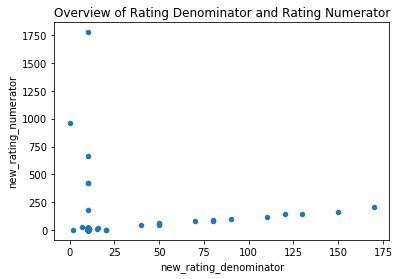

In [66]:
rating_result = tweet_masterdata_complete2.plot(x='new_rating_denominator',y='new_rating_numerator',kind= 'scatter' )  
rating_result.set_xlabel('new_rating_denominator')
rating_result.set_ylabel('new_rating_numerator')
rating_result.set_title('Overview of Rating Denominator and Rating Numerator')

Text(0,0.5,'Average Rating Results')

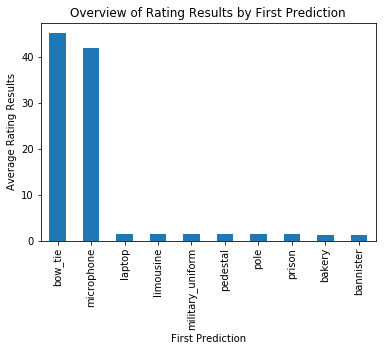

In [67]:
new_rating_result = tweet_masterdata_complete2.groupby('first_prediction').new_rating_result.mean().nlargest(10)
new_rating_result.plot(kind='bar')
plt.title('Overview of Rating Results by First Prediction')
plt.xlabel('First Prediction')
plt.ylabel('Average Rating Results')
# As there are many image preditions are not related to dogs, the below analysis will exclude non-dogs images.

Text(0,0.5,'Dog Types')

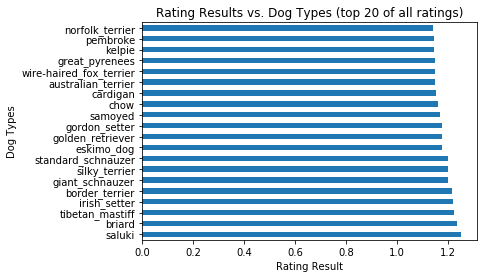

In [68]:
new_rating_result_dogs = tweet_masterdata_complete2[tweet_masterdata_complete2['is_a_dog']==True].groupby('first_prediction').new_rating_result.mean().sort_values(ascending=False).head(20)
new_rating_result_dogs.plot(kind='barh')
plt.title('Rating Results vs. Dog Types (top 20 of all ratings)')
plt.xlabel('Rating Result')
plt.ylabel('Dog Types')
# The top 20 dog types have rating result more than 1 (rating_numerator / rating_denominator). Below will have analysis on rating result lower than 1. 

Text(0,0.5,'Dog Types')

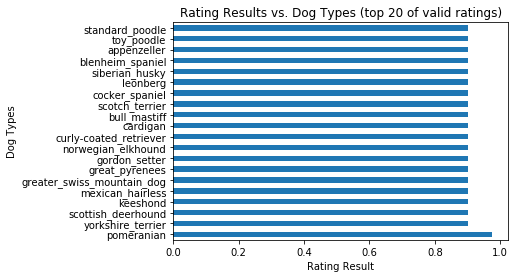

In [69]:
new_rating_result_dogs = tweet_masterdata_complete2[(tweet_masterdata_complete2['is_a_dog']==True) & (tweet_masterdata_complete2['new_rating_result']<1)].groupby('first_prediction').new_rating_result.mean().sort_values(ascending=False).head(20)
new_rating_result_dogs.plot(kind='barh')
plt.title('Rating Results vs. Dog Types (top 20 of valid ratings)')
plt.xlabel('Rating Result')
plt.ylabel('Dog Types')
# The top 20 dog types have all most the same rating result (0.8), except "pomeranian". Considering the unreasonable rating denominator, no conclusion is made based on this analysis.

In [70]:
tweet_masterdata_complete2.query('name!="NaN"').name.count(),tweet_masterdata_complete2.query('name=="None"').name.count()

(1556, 0)

In [71]:
tweet_masterdata_complete2.name.isnull().sum()

800

In [72]:
tweet_masterdata_complete2.sort_values(by = 'name').groupby('name').size().sort_values(ascending=False).head(10)

name
charlie    12
lucy       11
oliver     11
cooper     11
tucker     10
lola       10
penny      10
winston     9
bo          9
sadie       8
dtype: int64

**Understand if there is relationship between favorite_count and retweet_count**

Text(0.5,1,'Favorite vs. Retweeted')

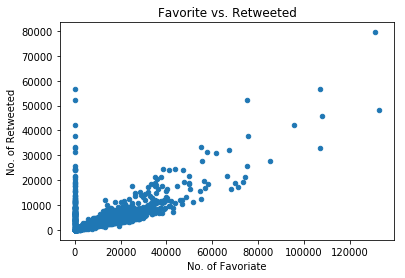

In [73]:
popularity = tweet_masterdata_complete2.plot(x='favorite_count',y='retweet_count',kind= 'scatter' )  
popularity.set_xlabel('No. of Favoriate')
popularity.set_ylabel('No. of Retweeted')
popularity.set_title('Favorite vs. Retweeted')

In [74]:
tweet_masterdata_complete2['favorite_count'].corr(tweet_masterdata_complete2['retweet_count'])

0.70288135961450349

In [75]:
#It's interesting to see there is zero favorite_count, but high number of retweet_counts. 
tweet_masterdata_complete2[(tweet_masterdata_complete2['favorite_count'] == 0) & 
                           (tweet_masterdata_complete2['retweet_count'] != 0)]
#Find below 179 items at twitter posts, but these posts actually have also non-zero favoriate_count.
#Another quality issue is noted.

,tweet_id,timestamp,text,name,new_rating_numerator,new_rating_denominator,new_rating_result,stage_new,img_num,first_prediction,confidence,is_a_dog,favorite_count,retweet_count
32,886054160059072513,2017-07-15 02:45:48,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,NaN,12.0,10,1.200000,None,NaN,NaN,NaN,NaN,0.0,108.0
36,885311592912609280,2017-07-13 01:35:06,RT @dog_rates: This is Lilly. She just paralle...,lilly,13.0,10,1.300000,None,NaN,NaN,NaN,NaN,0.0,19297.0
68,879130579576475649,2017-06-26 00:13:58,RT @dog_rates: This is Emmy. She was adopted t...,emmy,14.0,10,1.400000,None,NaN,NaN,NaN,NaN,0.0,7181.0
73,878404777348136964,2017-06-24 00:09:53,RT @dog_rates: Meet Shadow. In an attempt to r...,shadow,13.0,10,1.300000,None,NaN,NaN,NaN,NaN,0.0,1349.0
74,878316110768087041,2017-06-23 18:17:33,RT @dog_rates: Meet Terrance. He's being yelle...,terrance,11.0,10,1.100000,None,NaN,NaN,NaN,NaN,0.0,6965.0
78,877611172832227328,2017-06-21 19:36:23,RT @rachel2195: @dog_rates the boyfriend and h...,NaN,14.0,10,1.400000,pupper,1.0,irish_setter,0.364729,True,0.0,83.0
91,874434818259525634,2017-06-13 01:14:41,RT @dog_rates: This is Coco. At first I though...,coco,12.0,10,1.200000,None,NaN,NaN,NaN,NaN,0.0,15546.0
95,873697596434513921,2017-06-11 00:25:14,RT @dog_rates: This is Walter. He won't start ...,walter,14.0,10,1.400000,None,NaN,NaN,NaN,NaN,0.0,12518.0
97,873337748698140672,2017-06-10 00:35:19,RT @dog_rates: This is Sierra. She's one preci...,sierra,12.0,10,1.200000,pupper,NaN,NaN,NaN,NaN,0.0,1667.0
101,872668790621863937,2017-06-08 04:17:07,RT @loganamnosis: Penelope here is doing me qu...,NaN,14.0,10,1.400000,None,NaN,NaN,NaN,NaN,0.0,31.0


In [76]:
tweet_masterdata_complete2.groupby('is_a_dog').mean()

,new_rating_numerator,new_rating_denominator,new_rating_result,img_num,confidence,favorite_count,retweet_count
is_a_dog,,,,,,,
False,14.262760,10.512287,1.364908,1.172023,0.539191,7611.723485,2647.244318
True,11.509311,10.533784,1.093598,1.213514,0.614224,9269.653378,2784.982432


Text(0,0.5,'Average Confidence')

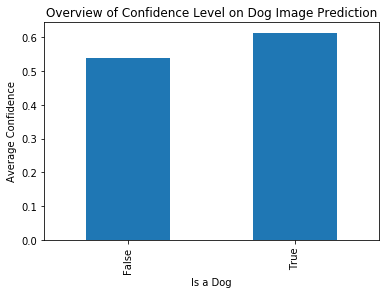

In [77]:
confidence_level = tweet_masterdata_complete2.groupby('is_a_dog').confidence.mean()
confidence_level.plot(kind='bar')
plt.title('Overview of Confidence Level on Dog Image Prediction')
plt.xlabel('Is a Dog')
plt.ylabel('Average Confidence')

Text(0.5,1,'Overview of Dog Dictionary')

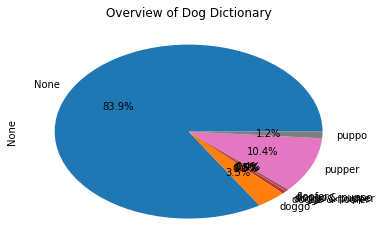

In [78]:
dog_dictionary = tweet_masterdata_complete2.groupby('stage_new').size()
dog_dictionary.plot(kind='pie', autopct='%1.1f%%')
plt.title('Overview of Dog Dictionary')

Text(0.5,1,'Overview of Dog Dictionary')

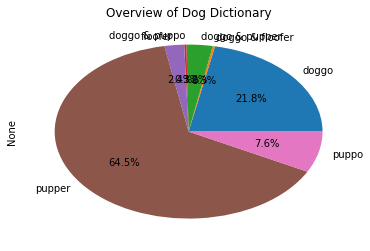

In [79]:
dog_dictionary2 = tweet_masterdata_complete2.query('stage_new !="None"').groupby('stage_new').size()
dog_dictionary2.plot(kind='pie', autopct='%1.1f%%')
plt.title('Overview of Dog Dictionary')


Text(0,0.5,'No. of Dogs at Tweet MasterData')

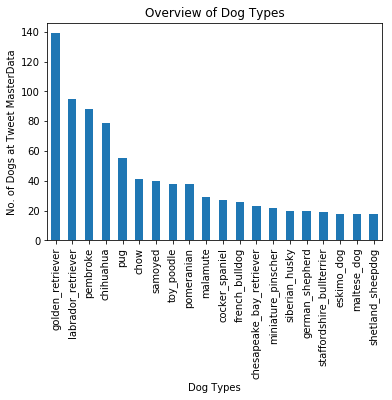

In [80]:
overview_dog_type = tweet_masterdata_complete2[tweet_masterdata_complete2['is_a_dog']==True].groupby('first_prediction').size().sort_values(ascending=False).head(20)
overview_dog_type.plot(kind='bar')
plt.title('Overview of Dog Types')
plt.xlabel('Dog Types')
plt.ylabel('No. of Dogs at Tweet MasterData')

In [81]:
tweet_masterdata_complete2[tweet_masterdata_complete2['is_a_dog']==True].groupby('first_prediction').size().sort_values(ascending=False).head(4)

first_prediction
golden_retriever      139
labrador_retriever     95
pembroke               88
chihuahua              79
dtype: int64

In [82]:
len(tweet_masterdata_complete2[tweet_masterdata_complete2['is_a_dog']==True])

1480

Text(0.5,1,'Overview of Dog Posts')

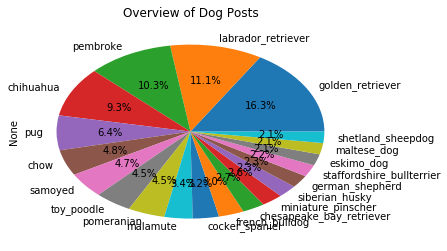

In [83]:
overview_dog_type = tweet_masterdata_complete2[tweet_masterdata_complete2['is_a_dog']==True].groupby('first_prediction').size().sort_values(ascending=False).head(20)
overview_dog_type.plot(kind='pie', autopct='%1.1f%%')
plt.title('Overview of Dog Posts')

Text(0,0.5,'Average No. of Dogs Are Favoriated')

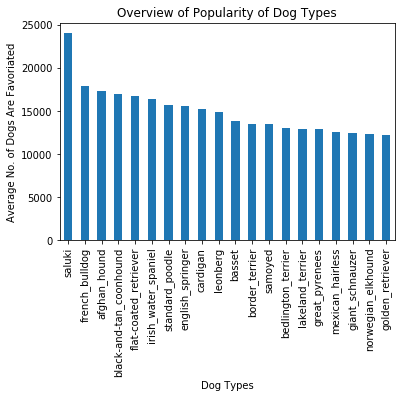

In [84]:
popular_dog_type_favorite = tweet_masterdata_complete2[tweet_masterdata_complete2['is_a_dog']==True].groupby('first_prediction').favorite_count.mean().nlargest(20)
popular_dog_type_favorite.plot(kind='bar')
plt.title('Overview of Popularity of Dog Types')
plt.xlabel('Dog Types')
plt.ylabel('Average No. of Dogs Are Favoriated')

Text(0.5,1,'Overview of Most Favoriate Dog Posts')

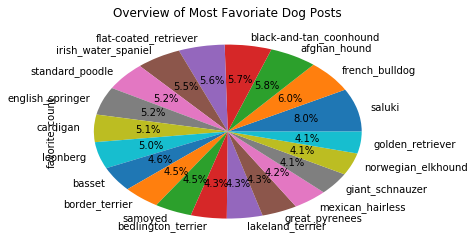

In [85]:
popular_dog_type_favorite = tweet_masterdata_complete2[tweet_masterdata_complete2['is_a_dog']==True].groupby('first_prediction').favorite_count.mean().nlargest(20)
popular_dog_type_favorite.plot(kind='pie', autopct='%1.1f%%')
plt.title('Overview of Most Favoriate Dog Posts')

In [86]:
tweet_masterdata_complete2[tweet_masterdata_complete2['first_prediction']=='saluki']

,tweet_id,timestamp,text,name,new_rating_numerator,new_rating_denominator,new_rating_result,stage_new,img_num,first_prediction,confidence,is_a_dog,favorite_count,retweet_count
54,881666595344535552,2017-07-03 00:11:11,This is Gary. He couldn't miss this puppertuni...,gary,13.0,10,1.3,None,1.0,saluki,0.529012,True,51522.0,11099.0
80,877316821321428993,2017-06-21 00:06:44,Meet Dante. At first he wasn't a fan of his ne...,dante,13.0,10,1.3,None,1.0,saluki,0.509967,True,27907.0,5414.0
467,817120970343411712,2017-01-05 21:29:55,Name a more iconic quartet... I'll wait. 13/10...,NaN,13.0,10,1.3,None,1.0,saluki,0.568809,True,13367.0,3011.0
974,750056684286914561,2016-07-04 20:00:23,This is Jameson. He had a few too many in the ...,jameson,11.0,10,1.1,None,1.0,saluki,0.484428,True,3444.0,1011.0


Text(0,0.5,'Average No. of Dogs Are Retweeted')

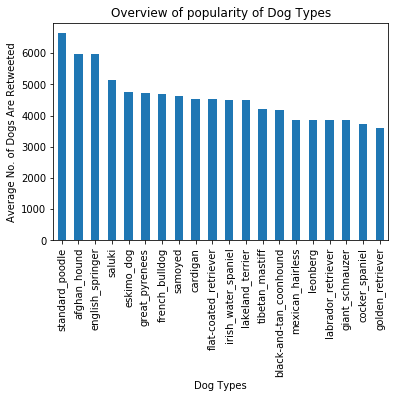

In [87]:
popular_dog_type_retweet = tweet_masterdata_complete2[tweet_masterdata_complete2['is_a_dog']==True].groupby('first_prediction').retweet_count.mean().nlargest(20)
popular_dog_type_retweet.plot(kind='bar')
plt.title('Overview of popularity of Dog Types')
plt.xlabel('Dog Types')
plt.ylabel('Average No. of Dogs Are Retweeted')

Text(0.5,1,'Overview of Most Retweeted Dog Posts')

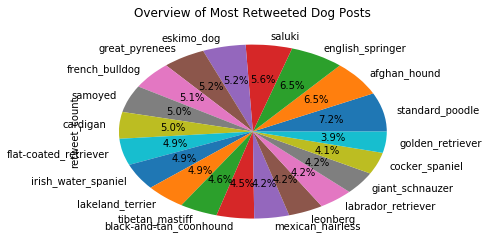

In [88]:
popular_dog_type_retweet = tweet_masterdata_complete2[tweet_masterdata_complete2['is_a_dog']==True].groupby('first_prediction').retweet_count.mean().nlargest(20)
popular_dog_type_retweet.plot(kind='pie', autopct='%1.1f%%')
plt.title('Overview of Most Retweeted Dog Posts')

In [89]:
tweet_masterdata_complete2[tweet_masterdata_complete2['first_prediction']=='standard_poodle']

,tweet_id,timestamp,text,name,new_rating_numerator,new_rating_denominator,new_rating_result,stage_new,img_num,first_prediction,confidence,is_a_dog,favorite_count,retweet_count
449,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,bo,14.0,10,1.4,doggo,1.0,standard_poodle,0.351308,True,95450.0,42228.0
874,761292947749015552,2016-08-04 20:09:17,Meet Bonaparte. He's pupset because it's cloud...,bonaparte,11.0,10,1.1,None,1.0,standard_poodle,0.660893,True,4957.0,1265.0
976,750026558547456000,2016-07-04 18:00:41,Meet Jax &amp; Jil. Jil is yelling the pledge ...,jax,10.0,10,1.0,None,1.0,standard_poodle,0.258732,True,2986.0,888.0
1150,726224900189511680,2016-04-30 01:41:23,I'm getting super heckin frustrated with you a...,NaN,9.0,10,0.9,None,1.0,standard_poodle,0.261112,True,4811.0,1302.0
1533,689999384604450816,2016-01-21 02:34:07,This is Covach. He's trying to melt the snow. ...,covach,10.0,10,1.0,None,1.0,standard_poodle,0.444499,True,1561.0,424.0
2192,668932921458302977,2015-11-23 23:23:31,This is Herald. He likes to swing. Subtle tong...,herald,9.0,10,0.9,None,1.0,standard_poodle,0.237638,True,284.0,63.0
2220,668484198282485761,2015-11-22 17:40:27,Good teamwork between these dogs. One is on lo...,NaN,9.0,10,0.9,None,1.0,standard_poodle,0.587372,True,453.0,253.0


Text(0.5,1,'No. of Images vs. Retweeted')

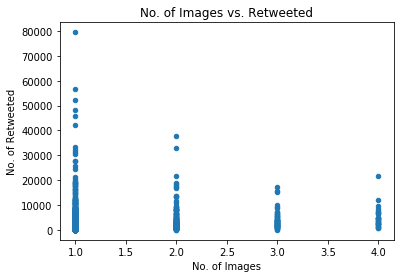

In [90]:
image_number_retweet = tweet_masterdata_complete2.plot(x='img_num',y='retweet_count',kind= 'scatter' )  
image_number_retweet.set_xlabel('No. of Images')
image_number_retweet.set_ylabel('No. of Retweeted')
image_number_retweet.set_title('No. of Images vs. Retweeted')
# The result indicates that the more images doesn't mean the more retweeted.

In [91]:
tweet_masterdata_complete2['retweet_count'].corr(tweet_masterdata_complete2['img_num'])

0.10745027571846041

In [92]:
tweet_masterdata_complete2['new_rating_result'].corr(tweet_masterdata_complete2['favorite_count'])

nan

Text(0.5,1,'Rating Results vs. No. of Retweeted')

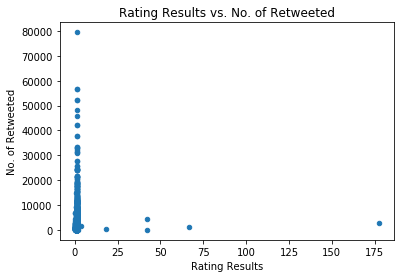

In [93]:
rating_retweet = tweet_masterdata_complete2.plot(x='new_rating_result',y='retweet_count',kind= 'scatter' )  
rating_retweet.set_xlabel('Rating Results')
rating_retweet.set_ylabel('No. of Retweeted')
rating_retweet.set_title('Rating Results vs. No. of Retweeted')
# No relationship between rating_result and number of retweet_count.

In [94]:
tweet_masterdata_complete2.head(1)

,tweet_id,timestamp,text,name,new_rating_numerator,new_rating_denominator,new_rating_result,stage_new,img_num,first_prediction,confidence,is_a_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,phineas,13.0,10,1.3,None,1.0,orange,0.097049,False,39467.0,8853.0


In [95]:
tweet_masterdata_complete2.to_csv('twitter_archive_master.csv', index = False)

## Limitations  
1.**tweet_masterdata**: Unreasonable rating_nominator, although it’s probably twitter humor, but there are extreme rating, e.g., 1776, 960, 666, 420. 1451 rows out of 2356 are noted that rating_numerator is higher than rating_denominator. Considering the majority of the rating is unreasonable, no conclusion is made for the relevant analysis. Although the correction according to twitter text has been made, but in general unreasonable rating result is seen.  

2.**tweet_masterdata**: Although this is information about dog dictionaries (stages), but the majority of the tweets (83.9%) do not have information on this. Based on limited information (16% out of all the available information), we can see  10% is under pupper stage. Moreover, 14 cases noted that there multiple stages are selected, e.g., doggo & puppo. Thus no concrete conlusion can be made based on the limited information.  

3.**tweet_overview**: Find 179 out of 2009 valid rows with zero favorite_count, while there is retweet_count, but some posts actually have also non-zero favorite_count at twitter posts.  

4.**image_predition**: The average confidence of image prediction for dogs is only 61% (non-dog is 54%). Thus it’s possible that there are non-dog images but recognized as dogs. 


## Conclusions:
1) Based on valid 1556 non-null data, the top 4 of the most popular dog names are listed below based on numbers of tweet_id:
charlie (12), lucy(11), oliver (11), cooper (11)  

2) A positive relationship (70%) is noted betweeen favorite_count and retweet_count which means usually the favorite, usually the post is more retweeted.  

3) Based on the twitter image prediction with valid dog image prediction (1480 rows), golden retriever (16.3%) has the most posts, followed by labrador retriever (11.1%) and pembroke (10.3%), and chihuahua (9.3%).  

4) It’s interesting to note that the most posted dogs don’t mean the most popular dogs. For example, based on the top 20 most favorite_count, saluki (8%), french_bulldog (6%), afghan_hound (5.8%), and black-and-tan_coohound (5.7%) are the top 4 types of dogs have the most favorite_count.  

However, while reviewing actual twitter post (example of tweet_id 881666595344535552), the post with most favorite_count seems not because of the dog type, but because of the way how the photo is taken. In this case, it’s a dog selfie where we can’t really judge the dog type based on the photo and many people reacted also with their dogs’ selfie.  

5) Due to the limitation of invalid favorite_count noted (179 rows without favorite_count but do have retweet_count), we also analyze the popularity of dogs based on tweet_count. The result of top 20 most retweet_count is slightly different from top 20 favorite_counts with following: standard_poodle(7.2%), afghan_hound (6.5%), english_sprinter (6.5%), and saluki(5.6%). However, in general, except the top 1 (standard_poodle 7%), the rest top 19 dog types have evenly 4-6.5% popularity among all. Thus we may conclude there are a variety of dog types are liked by people.  

6) Moreover, it’s interesting to see there is very little relationship (11%) between the number of posted images and popularity. The more posted images don’t mean the more retweet_count for example.  

7) It’s also interesting to see that there is no relationship between rating_results and retweet_count. This is, the higher rating doesn’t mean the more popular of the post. However, this is also due to the unreasonableness of rating_numerator.  





